# Content based Recommender System
In this project I will build a **Content Based Recommender System**. Here I will use ***Cosine Similarity*** for searching/filtering similar content in terms of the user inputs.

I want to based on the data related to the movies people watched in the past and recommend similar movies based on the features *Plot, genre, director, etc...*.

For example: If we search for *Titanic* movie, similar movies should be present at the Recommended movies section.

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer # Document Term Frequency

In [131]:
pd.set_option('display.max_columns', 100)
df = pd.read_csv('https://query.data.world/s/uikepcpffyo2nhig52xxeevdialfl7')
#df = pd.read_csv('movie_data.csv') # if above url does not worling, uncomment this line, comment above and run again
df.head()

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings.Source,Ratings.Value,Metascore,imdbRating,imdbVotes,imdbID,Type,tomatoMeter,tomatoImage,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.3/10,80.0,9.3,"1,825,626",tt0111161,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.2/10,100.0,9.2,"1,243,444",tt0068646,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,3,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.0/10,85.0,9.0,"856,870",tt0071562,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
3,4,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.0/10,82.0,9.0,"1,802,351",tt0468569,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,5,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,8.9/10,96.0,8.9,"494,215",tt0050083,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


In [132]:
df.shape

(250, 38)

We can see that above dataset has 38 features. We do not need all of them in this particular task. So, let's select the features we need and update our original dataset.

In [133]:
df = df[['Title','Genre','Director','Actors','Plot']]
df.head()

,Title,Genre,Director,Actors,Plot
0,The Shawshank Redemption,"Crime, Drama",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...
1,The Godfather,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...
2,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...
3,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...
4,12 Angry Men,"Crime, Drama",Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...


### Some data preparation...
Using Pythons' *map* function with the help of *Lambda function*
1. *Genre* and *Actors* columns, they consists of comma separated values. We need to separate them in terms of using them effectively in our searching/filtering algorithm. Convert them to lowercase to avoid duplicates. ***(Python is case sensitive)*** -> `'robin' == 'Robin' # outputs False`
2. *Director* names also be separated using space in between.

In [134]:
df['Actors'] = df['Actors'].map(lambda x: x.lower().split(','))

In [135]:
df['Actors']

0      [tim robbins,  morgan freeman,  bob gunton,  w...
1      [marlon brando,  al pacino,  james caan,  rich...
2      [al pacino,  robert duvall,  diane keaton,  ro...
3      [christian bale,  heath ledger,  aaron eckhart...
4      [martin balsam,  john fiedler,  lee j. cobb,  ...
                             ...                        
245    [ray milland,  jane wyman,  phillip terry,  ho...
246    [brie larson,  john gallagher jr.,  stephanie ...
247    [cary grant,  rosalind russell,  ralph bellamy...
248    [sissy spacek,  jane galloway heitz,  joseph a...
249    [dev patel,  saurabh shukla,  anil kapoor,  ra...
Name: Actors, Length: 250, dtype: object

In [136]:
df['Genre'] = df['Genre'].map(lambda x: x.lower().split(','))

In [137]:
df['Genre']

0                 [crime,  drama]
1                 [crime,  drama]
2                 [crime,  drama]
3        [action,  crime,  drama]
4                 [crime,  drama]
                  ...            
245           [drama,  film-noir]
246                       [drama]
247    [comedy,  drama,  romance]
248           [biography,  drama]
249                       [drama]
Name: Genre, Length: 250, dtype: object

In [138]:
df['Director'] = df['Director'].map(lambda x: x.lower().split(' '))

In [139]:
df['Director']

0                      [frank, darabont]
1               [francis, ford, coppola]
2               [francis, ford, coppola]
3                   [christopher, nolan]
4                        [sidney, lumet]
                     ...                
245                      [billy, wilder]
246            [destin, daniel, cretton]
247                      [howard, hawks]
248                       [david, lynch]
249    [danny, boyle,, loveleen, tandan]
Name: Director, Length: 250, dtype: object

In this step I *Join* each *Actors* names and *Director* names as a single string. Then they are not treated as two seprate words.

In [140]:
for index, row in df.iterrows():
    row['Actors'] = [x.replace(' ', '') for x in row['Actors']]
    row['Director'] = ''.join(row['Director'])

In [141]:
df['Actors']

0      [timrobbins, morganfreeman, bobgunton, william...
1      [marlonbrando, alpacino, jamescaan, richards.c...
2      [alpacino, robertduvall, dianekeaton, robertde...
3      [christianbale, heathledger, aaroneckhart, mic...
4      [martinbalsam, johnfiedler, leej.cobb, e.g.mar...
                             ...                        
245    [raymilland, janewyman, phillipterry, howardda...
246    [brielarson, johngallagherjr., stephaniebeatri...
247    [carygrant, rosalindrussell, ralphbellamy, gen...
248    [sissyspacek, janegallowayheitz, josepha.carpe...
249     [devpatel, saurabhshukla, anilkapoor, rajzutshi]
Name: Actors, Length: 250, dtype: object

In [142]:
df['Director']

0                  frankdarabont
1             francisfordcoppola
2             francisfordcoppola
3               christophernolan
4                    sidneylumet
                 ...            
245                  billywilder
246          destindanielcretton
247                  howardhawks
248                   davidlynch
249    dannyboyle,loveleentandan
Name: Director, Length: 250, dtype: object

I use *rake_nltk* **Naturel Language Toolkit** library for continue this work.

Let's install it.

In [143]:
!pip install rake_nltk

In [144]:
import rake_nltk
from rake_nltk import Rake # for extracting significant keywords in the entire text
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\navilog\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\navilog\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### ***Rake()***
*Rake()* is used to extract keywords from a large text like *Plot* in our case. Let's use *Rake* now...

And I store the *Keywords* in a new column called *Key_words*

In [145]:
df['Key_words']="" # initializing the new column

for index, row in df.iterrows():
    plot = row['Plot']
    
    # instantiating Rake
    # by default it uses English stopwords from NLTK and discard all punctuations and characters
    r = Rake()
    
    # extracting the words by passing the text
    r.extract_keywords_from_text(plot)
    
    # preparing a dictionary with keywords and their scores
    keyword_dict_score = r.get_word_degrees()
    
    # assign keywords to the new column
    row['Key_words'] = list(keyword_dict_score.keys())
    
df['Key_words']

0      [two, imprisoned, men, bond, number, years, fi...
1      [aging, patriarch, organized, crime, dynasty, ...
2      [early, life, career, vito, corleone, 1920s, n...
3      [menace, known, joker, emerges, mysterious, pa...
4      [jury, holdout, attempts, prevent, miscarriage...
                             ...                        
245    [desperate, life, chronic, alcoholic, followed...
246    [20, something, supervising, staff, member, re...
247    [newspaper, editor, uses, every, trick, book, ...
248    [old, man, makes, long, journey, lawn, mover, ...
249    [mumbai, teen, reflects, upbringing, slums, ac...
Name: Key_words, Length: 250, dtype: object

In [146]:
# Now we don't need Plot column
df.drop('Plot', axis=1, inplace=True)

#### Keywords and scores...
As an example, these are the keywords extrated from last movie in the dataset and their scores

In [147]:
keyword_dict_score

defaultdict(<function rake_nltk.rake.Rake._build_word_co_occurance_graph.<locals>.<lambda>()>,
            {'mumbai': 3,
             'teen': 3,
             'reflects': 3,
             'upbringing': 1,
             'slums': 1,
             'accused': 1,
             'cheating': 1,
             'indian': 2,
             'version': 2,
             'wants': 1,
             'millionaire': 2,
             '?"': 2})

In [148]:
df.tail(1)

,Title,Genre,Director,Actors,Key_words
249,Slumdog Millionaire,[drama],"dannyboyle,loveleentandan","[devpatel, saurabhshukla, anilkapoor, rajzutshi]","[mumbai, teen, reflects, upbringing, slums, ac..."


#### Set the *Title* as the index
Setting the *Title* as the index will ease identifying records instead of numerical index.

In [149]:
df.set_index('Title', inplace=True)
df.head()

,Genre,Director,Actors,Key_words
Title,,,,
The Shawshank Redemption,"[crime, drama]",frankdarabont,"[timrobbins, morganfreeman, bobgunton, william...","[two, imprisoned, men, bond, number, years, fi..."
The Godfather,"[crime, drama]",francisfordcoppola,"[marlonbrando, alpacino, jamescaan, richards.c...","[aging, patriarch, organized, crime, dynasty, ..."
The Godfather: Part II,"[crime, drama]",francisfordcoppola,"[alpacino, robertduvall, dianekeaton, robertde...","[early, life, career, vito, corleone, 1920s, n..."
The Dark Knight,"[action, crime, drama]",christophernolan,"[christianbale, heathledger, aaroneckhart, mic...","[menace, known, joker, emerges, mysterious, pa..."
12 Angry Men,"[crime, drama]",sidneylumet,"[martinbalsam, johnfiedler, leej.cobb, e.g.mar...","[jury, holdout, attempts, prevent, miscarriage..."


### Now we create a column called *bag_of_words*
*bag_of_words* is used to store all the terms we prepared and keywrods we extracted in one place.

*i.e.* use in *Term Frequency Matrix*

In [150]:
df['bag_of_words'] = ''

columns = df.columns
for index, row in df.iterrows():
    words = ''
    for col in columns:
        if col == 'Director':
            words += row[col] + ' '
        else:
            words += ' '.join(row[col]) + ' '
    row['bag_of_words'] = words
    
df.head()        

,Genre,Director,Actors,Key_words,bag_of_words
Title,,,,,
The Shawshank Redemption,"[crime, drama]",frankdarabont,"[timrobbins, morganfreeman, bobgunton, william...","[two, imprisoned, men, bond, number, years, fi...",crime drama frankdarabont timrobbins morganfr...
The Godfather,"[crime, drama]",francisfordcoppola,"[marlonbrando, alpacino, jamescaan, richards.c...","[aging, patriarch, organized, crime, dynasty, ...",crime drama francisfordcoppola marlonbrando a...
The Godfather: Part II,"[crime, drama]",francisfordcoppola,"[alpacino, robertduvall, dianekeaton, robertde...","[early, life, career, vito, corleone, 1920s, n...",crime drama francisfordcoppola alpacino rober...
The Dark Knight,"[action, crime, drama]",christophernolan,"[christianbale, heathledger, aaroneckhart, mic...","[menace, known, joker, emerges, mysterious, pa...",action crime drama christophernolan christia...
12 Angry Men,"[crime, drama]",sidneylumet,"[martinbalsam, johnfiedler, leej.cobb, e.g.mar...","[jury, holdout, attempts, prevent, miscarriage...",crime drama sidneylumet martinbalsam johnfied...


#### Now we only need the *Index* column and *bag_of_words* column
*bag_for_words* has everything we need. Let's drop others

In [151]:
df.drop([col for col in columns if col != 'bag_of_words'], axis=1, inplace=True)

In [152]:
df.head()

,bag_of_words
Title,
The Shawshank Redemption,crime drama frankdarabont timrobbins morganfr...
The Godfather,crime drama francisfordcoppola marlonbrando a...
The Godfather: Part II,crime drama francisfordcoppola alpacino rober...
The Dark Knight,action crime drama christophernolan christia...
12 Angry Men,crime drama sidneylumet martinbalsam johnfied...


### CountVectorizer()
*CountVetorizer()* pick all the unique words in each *bag_of_words* and count their frequency. Basically it converts the text into ***lowercase*** and ***word-level tokenization***.

In [153]:
count_vector = CountVectorizer()
count_matrix = count_vector.fit_transform(df['bag_of_words'])

In [154]:
count_matrix

<250x3176 sparse matrix of type '<class 'numpy.int64'>'
	with 5601 stored elements in Compressed Sparse Row format>

#### Let's see what's inside...

In [155]:
df_cv = pd.DataFrame(data=count_matrix.toarray(), columns=count_vector.get_feature_names_out())
df_cv.head()

,000,10,100,12,17,1820s,18th,1900,1920s,1936,1940s,1941,1948,1950s,1951,1954,1960s,1970s,1972,1979,1980,1984,19th,20,2029,24,25,30,40,7th,9000,aaroneckhart,abagnale,abandoned,abandons,abducted,abhishekbharate,ability,able,abrams,accelerated,accept,accepted,accepts,accident,accidentally,according,account,accumulates,accuracy,...,winter,wiped,wiser,within,without,witness,witnessing,wits,wizard,wolfgang,woman,womb,women,woody,woodyallen,woodyharrelson,wookiee,work,worker,workforce,working,works,world,wormhole,worship,worshipper,worth,worthy,would,wreak,wreaks,wrentz,write,writer,wrong,wwii,xolanimali,year,years,yet,yoda,york,young,younger,youngest,yuppie,zachgrenier,zero,zoesaldana,zubrowka
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [156]:
df_cv.shape

(250, 3176)

### Generate the *Cosine Similarity Matrix*
Since we have the *Term Frequency Matrix* now we can create the *Cosine Similarity Matrix* as follows.

In [157]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.14638501, 0.1315587 , ..., 0.05      , 0.05      ,
        0.05270463],
       [0.14638501, 1.        , 0.34236839, ..., 0.048795  , 0.048795  ,
        0.05143445],
       [0.1315587 , 0.34236839, 1.        , ..., 0.0438529 , 0.0438529 ,
        0.04622502],
       ...,
       [0.05      , 0.048795  , 0.0438529 , ..., 1.        , 0.05      ,
        0.05270463],
       [0.05      , 0.048795  , 0.0438529 , ..., 0.05      , 1.        ,
        0.05270463],
       [0.05270463, 0.05143445, 0.04622502, ..., 0.05270463, 0.05270463,
        1.        ]])

### Implementation of *Recommender* function

In [158]:
# take indeces (Movie Titles) of our DataFrame and create a Pandas Series out of it
indeces = pd.Series(df.index)
indeces

0      The Shawshank Redemption
1                 The Godfather
2        The Godfather: Part II
3               The Dark Knight
4                  12 Angry Men
                 ...           
245            The Lost Weekend
246               Short Term 12
247             His Girl Friday
248          The Straight Story
249         Slumdog Millionaire
Name: Title, Length: 250, dtype: object

Above series of titles are indexed similar to the *cosine_sim* matrix. So, we can map those indexes and reach relevant cosine similarities easily.

In [159]:
indeces[indeces == 'The Lost Weekend'].index[0]

245

In [160]:
def recommender(title, cosine_sim=cosine_sim):
    recommendations = []
    
    # get relevant indeces
    search_idx = indeces[indeces == title].index[0]
    
    # get relevant cosine similarity list and sort them
    similarities = pd.Series(cosine_sim[search_idx]).sort_values(ascending=False)
    
    # get top 10 matches (indexes)
    # use these indexes again to retrieve Movie titles
    top_10_matches = list(similarities.iloc[1:11].index)
    print(top_10_matches)
    
    # store best matched movie names
    for i in top_10_matches:
        recommendations.append(indeces[i])
        
    return recommendations
    

In [161]:
recommender('The Shawshank Redemption')

[7, 226, 18, 15, 151, 1, 212, 29, 110, 54]


['Pulp Fiction',
 'Rope',
 'Se7en',
 'Goodfellas',
 'Butch Cassidy and the Sundance Kid',
 'The Godfather',
 'Papillon',
 'The Green Mile',
 'Casino',
 'Once Upon a Time in America']

## **Netflix** recommendations
Based on previously watched movies, Netflix recommends list of movies as follows.
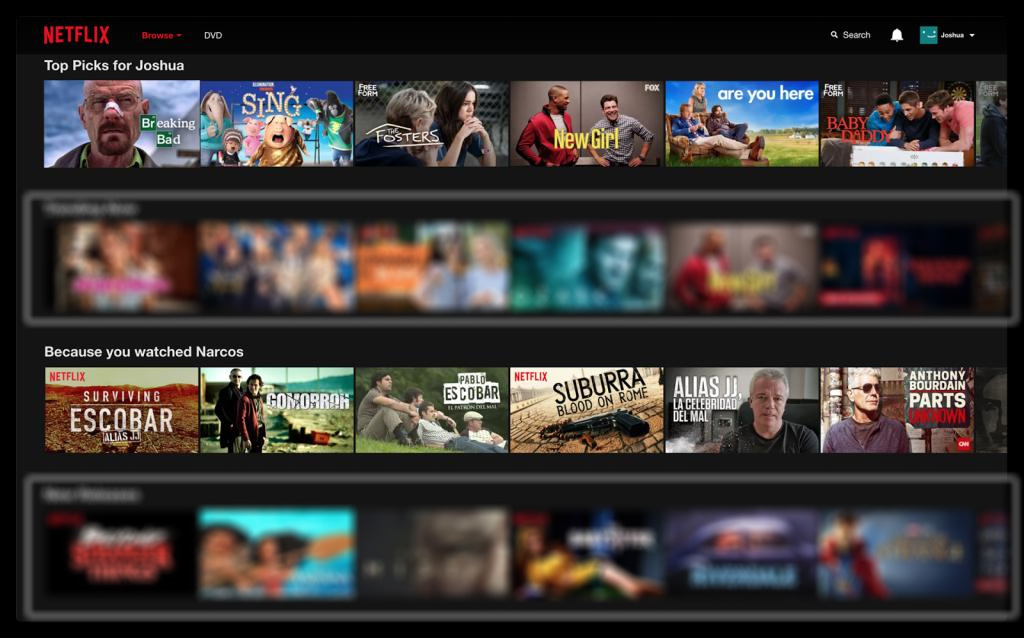